In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
medical_insurance_df=pd.read_csv('insurance.csv')

medical_insurance_df

In [6]:
medical_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
print('The size of Dataframe is: ', medical_insurance_df.shape)
print('-'* 100)
print('The Column Name, Record Count and Data Types are as follows:' )
medical_insurance_df.info()
print('-'* 100)

The size of Dataframe is:  (1338, 7)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
----------------------------------------------------------------------------------------------------


In [12]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in medical_insurance_df.columns if medical_insurance_df[feature].dtype != 'O']
categorical_features = [feature for feature in medical_insurance_df.columns if medical_insurance_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [13]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=medical_insurance_df.isnull().sum().sort_values(ascending=False)
percent=(medical_insurance_df.isnull().sum()/medical_insurance_df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [14]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
medical_insurance_df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


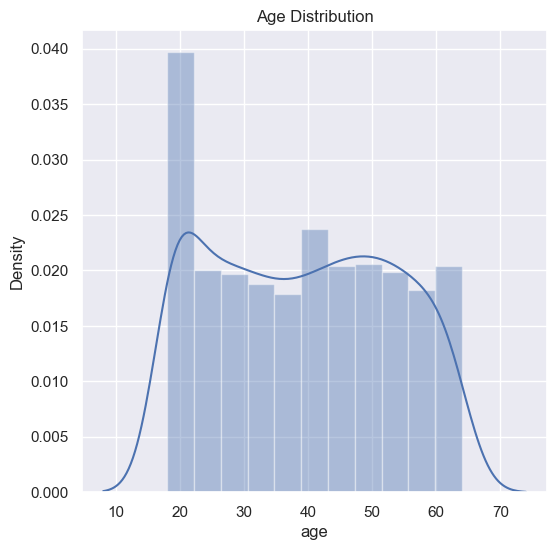

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance_df['age'])
plt.title('Age Distribution')
plt.show()

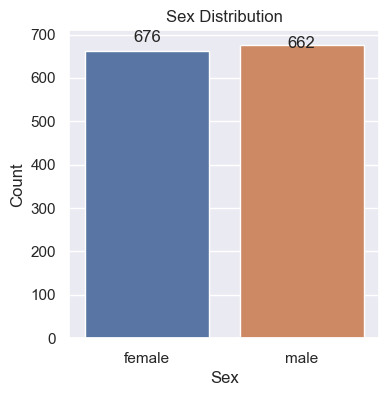

In [16]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='sex', data=medical_insurance_df)
plt.title('Sex Distribution')

counts = medical_insurance_df['sex'].value_counts()

for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

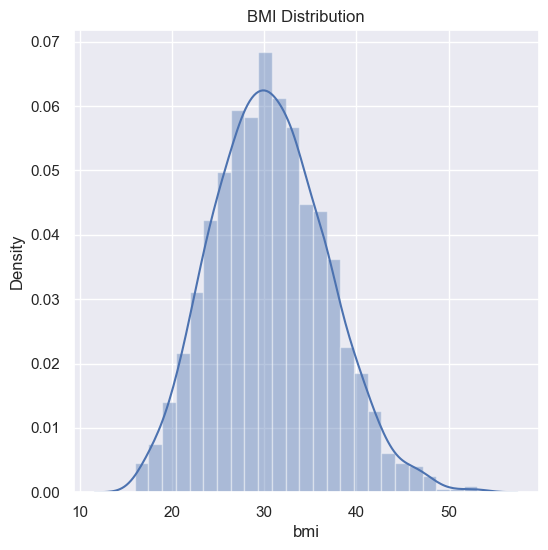

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance_df['bmi'])
plt.title('BMI Distribution')
plt.show()

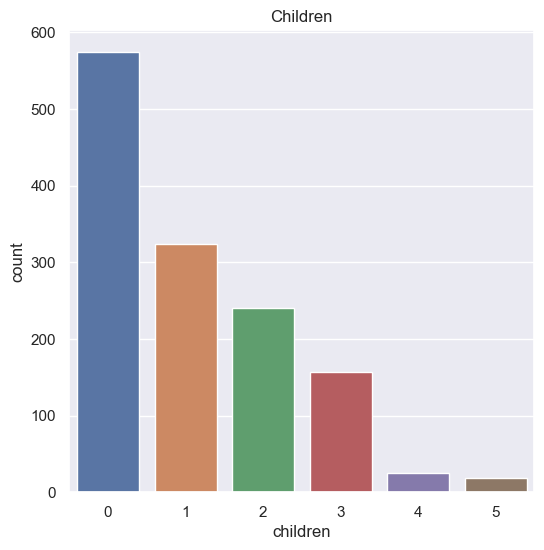

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=medical_insurance_df)
plt.title('Children')
plt.show()

In [19]:
children_count = medical_insurance_df['children'].value_counts()
children_count

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

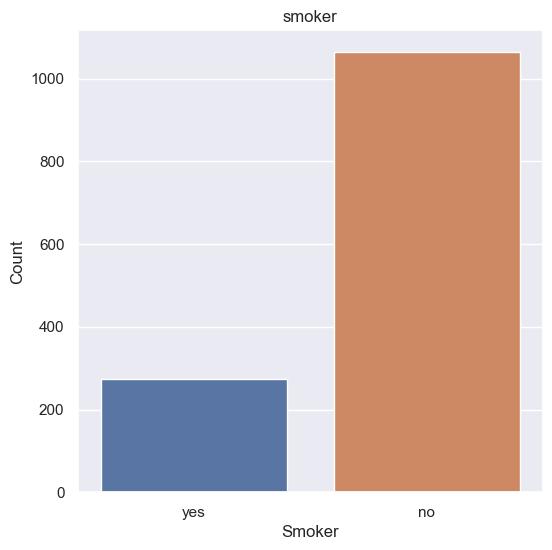

In [20]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='smoker', data=medical_insurance_df)
plt.title('smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

In [21]:
smoker_counts = medical_insurance_df['smoker'].value_counts()
smoker_counts


no     1064
yes     274
Name: smoker, dtype: int64

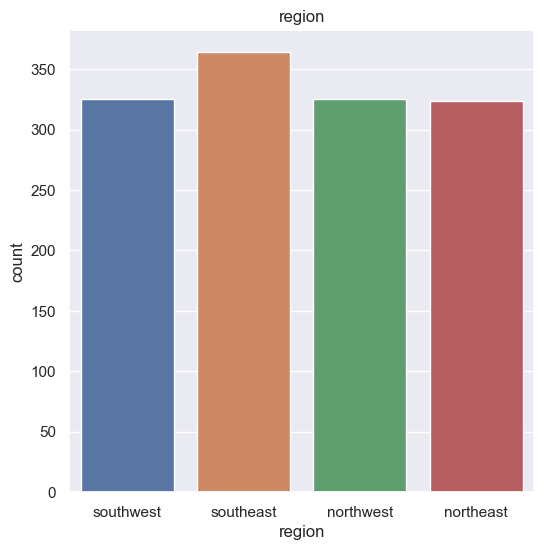

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=medical_insurance_df)
plt.title('region')
plt.show()

In [23]:
medical_insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

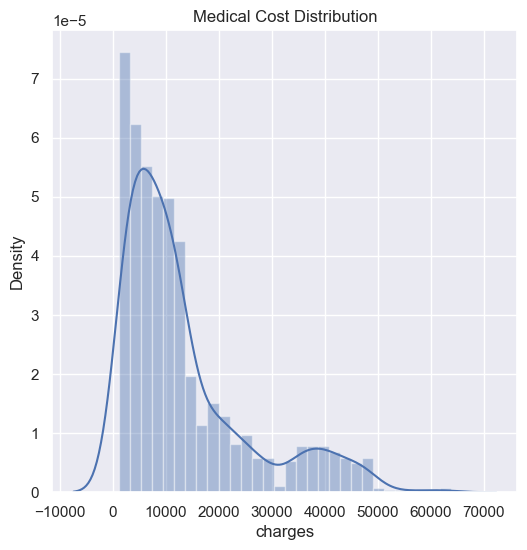

In [24]:
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance_df['charges'])
plt.title('Medical Cost Distribution')
plt.show()

In [25]:
# encoding sex column
medical_insurance_df.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
medical_insurance_df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
medical_insurance_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [26]:
medical_insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [27]:
# separating the data and labels
X = medical_insurance_df.drop(columns = ['charges'], axis=1) # Feature matrix
y = medical_insurance_df['charges'] # Target variable

In [29]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [31]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [33]:
scaler.fit(X)


StandardScaler()

In [34]:
standardized_data = scaler.transform(X)

In [35]:
standardized_data

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -0.40328924],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -1.28788104],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -1.28788104],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -1.28788104],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -0.40328924],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         1.36589436]])

In [36]:
X = standardized_data


In [37]:
X

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367, -1.97058663,
        -0.40328924],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719,  0.5074631 ,
        -1.28788104],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576,  0.5074631 ,
        -1.28788104],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367,  0.5074631 ,
        -1.28788104],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367,  0.5074631 ,
        -0.40328924],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367, -1.97058663,
         1.36589436]])

In [38]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [39]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [40]:
print(y.shape, y_train.shape, y_test.shape)


(1338,) (1070,) (268,)


In [41]:
# For Model Building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
models = [LinearRegression, Lasso, Ridge, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

for model in models:
    regressor = model().fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    rmse_scores.append(mean_squared_error(y_test, y_pred, squared=False))
    r2_scores.append(r2_score(y_test, y_pred))

In [43]:
regression_metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso", "Ridge", "SVR", "Decision Tree Regressor", "Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error": rmse_scores,
    "R-squared (R2)": r2_scores
})

regression_metrics_df.set_index('Model', inplace=True)
regression_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Model,,,,
Linear Regression,4443.153507,3.855841e+07,6209.541743,0.702062
Lasso,4442.786725,3.855646e+07,6209.385131,0.702077
Ridge,4443.686088,3.854839e+07,6208.734949,0.702140
SVR,7722.482857,1.425538e+08,11939.588349,-0.101502
Decision Tree Regressor,3051.624438,4.249459e+07,6518.787390,0.671648
Random Forest Regressor,2724.753605,2.297855e+07,4793.594311,0.822447


In [44]:
#In the context of medical insurance cost prediction,

#Among the models evaluated, Linear Regression, Lasso, and Ridge Regression exhibit similar levels of accuracy, with Mean Absolute Errors (MAE) around 4443 and R-squared values around 0.70. These models offer a reasonably good fit to the data and could be suitable for estimating insurance costs.
#However, the Support Vector Regressor (SVR) performs significantly worse, with a much higher MAE and a negative R-squared value, suggesting that it struggles to capture the underlying patterns in the data. Therefore, it may not be an appropriate choice for this prediction task.
#The Decision Tree Regressor and Random Forest Regressor show promising results, with lower MAE values and higher R-squared values, indicating their ability to capture complex relationships within the data. These models may offer superior performance in estimating medical insurance costs and could be worth further exploration and fine-tuning.


#In summary, for medical insurance cost prediction, the Random Forest Regressor seems to be the most promising model, providing accurate estimates with a low MAE and a high R-squared value, making it a potential choice for practical implementation.